In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import cdist
import networkx as nx
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False  


import os
import re
import math

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.ensemble import AdaBoostRegressor,ExtraTreesRegressor,RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor


from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict # 交叉验证所需的函数
from sklearn.model_selection import KFold,LeaveOneOut,LeavePOut,ShuffleSplit # 交叉验证所需的子集划分方法
from sklearn.model_selection import StratifiedKFold,StratifiedShuffleSplit # 分层分割
from sklearn.model_selection import GroupKFold,LeaveOneGroupOut,LeavePGroupsOut,GroupShuffleSplit # 分组分割



from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures

In [7]:
path = "../A2_data/A1_rawdata/Au20_OPT_1000/"
# path = "../A2_data/A1_rawdata/B45-_OPT_3751/"

# 读取文件名
def get_allfile(path):
    filelist = []
    get_dir = os.listdir(path)
    for i in get_dir:
        filelist.append(os.path.join(path,i))
    
    return filelist

# 测试
filelist = get_allfile(path)
# filelist

In [8]:
{'NodeCoor': [(0, 0), (1, -14), (7, -), (2, -15), (22, 31), (-23, 18), (10, -24), (-46, 10), (-11, 4), (-19, -27), (25, 11)], 'TravelCoor': [[(-14, -11), (-10, -4), (0, -21), (8, -6), (-5, -5)], [(15, -12), (-8, -10), (5, -22), (15, -10)], [(10, -21), (4, -20), (-9, -18), (-7, -20), (0, -13)], [(19, 37), (18, 23), (28, 26), (17, 31)], [(-17, 10), (-18, 25), (-4, 7), (-31, 5)], [(28, -31), (-4, -35), (20, -20)], [(-26, 7), (-40, 23), (-35, -8), (-35, 26)], [(-22, 10), (-1, -4), (2, -3)], [(-15, -37), (-5, -29), (-25, -20), (-29, -31)], [(16, 5), (20, -6), (16, 4)]], 'cus_all_points': [[(1, -14), (-14, -11), (-10, -4), (0, -21), (8, -6), (-5, -5), (1, -14)], [(7, -15), (15, -12), (-8, -10), (5, -22), (15, -10), (7, -15)], [(2, -15), (10, -21), (4, -20), (-9, -18), (-7, -20), (0, -13), (2, -15)], [(22, 31), (19, 37), (18, 23), (28, 26), (17, 31), (22, 31)], [(-23, 18), (-17, 10), (-18, 25), (-4, 7), (-31, 5), (-23, 18)], [(10, -24), (28, -31), (-4, -35), (20, -20), (10, -24)], [(-46, 10), (-26, 7), (-40, 23), (-35, -8), (-35, 26), (-46, 10)], [(-11, 4), (-22, 10), (-1, -4), (2, -3), (-11, 4)], [(-19, -27), (-15, -37), (-5, -29), (-25, -20), (-29, -31), (-19, -27)], [(25, 11), (16, 5), (20, -6), (16, 4), (25, 11)]], 'Timewindow': [[(0, 12), (1.72, 2.5), (2.7, 3.7), (4.19, 5.0), (5.42, 6.3), (6.63, 7.2)], [(0, 12), (1.78, 2.6), (3.18, 3.9), (4.34, 5.3), (5.69, 6.4)], [(0, 12), (1.63, 2.4), (2.55, 3.3), (3.63, 4.6), (4.67, 5.4), (5.65, 6.4)], [(0, 12), (1.67, 2.3), (2.65, 3.3), (3.56, 4.2), (4.5, 5.2)], [(0, 12), (2.14, 3.0), (3.38, 4.3), (4.87, 5.6), (6.28, 7.3)], [(0, 12), (1.81, 2.7), (3.51, 4.0), (4.71, 5.3)], [(0, 12), (2.15, 3.1), (3.63, 4.3), (5.09, 5.7), (6.55, 7.3)], [(0, 12), (1.69, 2.7), (3.33, 4.1), (4.18, 5.0)], [(0, 12), (1.33, 1.9), (2.22, 3.2), (3.75, 4.6), (4.89, 5.8)], [(0, 12), (2.08, 2.8), (3.09, 3.6), (3.87, 4.6)]], 'lowerTime': [[0, 1.72, 2.7, 4.19, 5.42, 6.63], [0, 1.78, 3.18, 4.34, 5.69], [0, 1.63, 2.55, 3.63, 4.67, 5.65], [0, 1.67, 2.65, 3.56, 4.5], [0, 2.14, 3.38, 4.87, 6.28], [0, 1.81, 3.51, 4.71], [0, 2.15, 3.63, 5.09, 6.55], [0, 1.69, 3.33, 4.18], [0, 1.33, 2.22, 3.75, 4.89], [0, 2.08, 3.09, 3.87]], 'upperTime': [[12, 2.5, 3.7, 5.0, 6.3, 7.2], [12, 2.6, 3.9, 5.3, 6.4], [12, 2.4, 3.3, 4.6, 5.4, 6.4], [12, 2.3, 3.3, 4.2, 5.2], [12, 3.0, 4.3, 5.6, 7.3], [12, 2.7, 4.0, 5.3], [12, 3.1, 4.3, 5.7, 7.3], [12, 2.7, 4.1, 5.0], [12, 1.9, 3.2, 4.6, 5.8], [12, 2.8, 3.6, 4.6]], 'HTimewindow': [(0, 12), (0, 12), (0, 12), (0, 12), (0, 12), (0, 12), (0, 12), (0, 12), (0, 12), (0, 12), (0, 12)], 'HlowerTime': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'HupperTime': [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12], 'Demand': [0, 16, 16, 12, 12, 14, 19, 13, 18, 17, 15], 'MaxLoad': 120, 'ServiceTime': 0, 'Velocity': 40, '客户出行位置数:': 201, '各点与仓库之间的平均距离:': 27.73, '平均出行时间:': 6.08}{'A客户出行位置数': 59, 'A各点与仓库之间的平均距离': 25.01, 'A客户平均出行时间': 6.05, '最佳运输计划为': [[0, 9, 3, 1, 2, 6, 0], [0, 4, 10, 0], [0, 7, 8, 5, 0]], '最佳访问点为': [[-1, 2, 4, 3, 3, 0, -1], [-1, 2, 0, -1], [-1, 1, 1, 1, -1]], '车辆数': 3, '配送总时间': 12.330000000000002, '配送总距离': (209.26,), '客户平均配送距离K2': 20.93, '配送比': 1.19, 'CPU：': 1197}{'NodeCoor': [(0, 0), (1, -14), (7, -15), (2, -15), (22, 31), (-23, 18), (10, -24), (-46, 10), (-11, 4), (-19, -27), (25, 11)], 'TravelCoor': [[(-14, -11), (-10, -4), (0, -21), (8, -6), (-5, -5)], [(15, -12), (-8, -10), (5, -22), (15, -10)], [(10, -21), (4, -20), (-9, -18), (-7, -20), (0, -13)], [(19, 37), (18, 23), (28, 26), (17, 31)], [(-17, 10), (-18, 25), (-4, 7), (-31, 5)], [(28, -31), (-4, -35), (20, -20)], [(-26, 7), (-40, 23), (-35, -8), (-35, 26)], [(-22, 10), (-1, -4), (2, -3)], [(-15, -37), (-5, -29), (-25, -20), (-29, -31)], [(16, 5), (20, -6), (16, 4)]], 'cus_all_points': [[(1, -14), (-14, -11), (-10, -4), (0, -21), (8, -6), (-5, -5), (1, -14)], [(7, -15), (15, -12), (-8, -10), (5, -22), (15, -10), (7, -15)], [(2, -15), (10, -21), (4, -20), (-9, -18), (-7, -20), (0, -13), (2, -15)], [(22, 31), (19, 37), (18, 23), (28, 26), (17, 31), (22, 31)], [(-23, 18), (-17, 10), (-18, 25), (-4, 7), (-31, 5), (-23, 18)], [(10, -24), (28, -31), (-4, -35), (20, -20), (10, -24)], [(-46, 10), (-26, 7), (-40, 23), (-35, -8), (-35, 26), (-46, 10)], [(-11, 4), (-22, 10), (-1, -4), (2, -3), (-11, 4)], [(-19, -27), (-15, -37), (-5, -29), (-25, -20), (-29, -31), (-19, -27)], [(25, 11), (16, 5), (20, -6), (16, 4), (25, 11)]], 'Timewindow': [[(0, 12), (1.72, 2.5), (2.7, 3.7), (4.19, 5.0), (5.42, 6.3), (6.63, 7.2)], [(0, 12), (1.78, 2.6), (3.18, 3.9), (4.34, 5.3), (5.69, 6.4)], [(0, 12), (1.63, 2.4), (2.55, 3.3), (3.63, 4.6), (4.67, 5.4), (5.65, 6.4)], [(0, 12), (1.67, 2.3), (2.65, 3.3), (3.56, 4.2), (4.5, 5.2)], [(0, 12), (2.14, 3.0), (3.38, 4.3), (4.87, 5.6), (6.28, 7.3)], [(0, 12), (1.81, 2.7), (3.51, 4.0), (4.71, 5.3)], [(0, 12), (2.15, 3.1), (3.63, 4.3), (5.09, 5.7), (6.55, 7.3)], [(0, 12), (1.69, 2.7), (3.33, 4.1), (4.18, 5.0)], [(0, 12), (1.33, 1.9), (2.22, 3.2), (3.75, 4.6), (4.89, 5.8)], [(0, 12), (2.08, 2.8), (3.09, 3.6), (3.87, 4.6)]], 'lowerTime': [[0, 1.72, 2.7, 4.19, 5.42, 6.63], [0, 1.78, 3.18, 4.34, 5.69], [0, 1.63, 2.55, 3.63, 4.67, 5.65], [0, 1.67, 2.65, 3.56, 4.5], [0, 2.14, 3.38, 4.87, 6.28], [0, 1.81, 3.51, 4.71], [0, 2.15, 3.63, 5.09, 6.55], [0, 1.69, 3.33, 4.18], [0, 1.33, 2.22, 3.75, 4.89], [0, 2.08, 3.09, 3.87]], 'upperTime': [[12, 2.5, 3.7, 5.0, 6.3, 7.2], [12, 2.6, 3.9, 5.3, 6.4], [12, 2.4, 3.3, 4.6, 5.4, 6.4], [12, 2.3, 3.3, 4.2, 5.2], [12, 3.0, 4.3, 5.6, 7.3], [12, 2.7, 4.0, 5.3], [12, 3.1, 4.3, 5.7, 7.3], [12, 2.7, 4.1, 5.0], [12, 1.9, 3.2, 4.6, 5.8], [12, 2.8, 3.6, 4.6]], 'HTimewindow': [(0, 12), (0, 12), (0, 12), (0, 12), (0, 12), (0, 12), (0, 12), (0, 12), (0, 12), (0, 12), (0, 12)], 'HlowerTime': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'HupperTime': [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12], 'Demand': [0, 16, 16, 12, 12, 14, 19, 13, 18, 17, 15], 'MaxLoad': 120, 'ServiceTime': 0, 'Velocity': 40, '客户出行位置数:': 201, '各点与仓库之间的平均距离:': 27.73, '平均出行时间:': 6.08}{'A客户出行位置数': 59, 'A各点与仓库之间的平均距离': 25.01, 'A客户平均出行时间': 6.05, '最佳运输计划为': [[0, 9, 3, 1, 2, 6, 0], [0, 4, 10, 0], [0, 7, 8, 5, 0]], '最佳访问点为': [[-1, 2, 4, 3, 3, 0, -1], [-1, 2, 0, -1], [-1, 1, 1, 1, -1]], '车辆数': 3, '配送总时间': 12.330000000000002, '配送总距离': (209.26,), '客户平均配送距离K2': 20.93, '配送比': 1.19, 'CPU：': 1197}
# 读取团簇数据
def read_one_xyz(filename):
    xyz = []
    with open(filename, 'r') as f: # 读取每一行
        flines = f.readlines()
        for fl in range(len(flines)):
            if fl == 0: # 第一行为原子个数
                num = flines[fl]
            elif fl == 1: # 第二行为能量
                power = np.array(re.findall(r"[-]?\d+\.?\d*",str(flines[fl]))[-1]).astype(float)
            else: # 其余行为坐标点
                xyz.append(flines[fl].split())
                
    axis_xyz = []  
    for i in xyz[1:]: # 划分坐标点为 x,y,z
        axis_xyz.append(i[1:4])
    axis_xyz_num = np.array(axis_xyz).astype(float)
    
    return axis_xyz_num,power

# 测试
xyz,power = read_one_xyz("../A2_data/A1_rawdata/Au20_OPT_1000/2.xyz")
# xyz,power = read_one_xyz("../A2_data/A1_rawdata/B45-_OPT_3751/2.xyz")
power
# xyz

array(-1549.729217)

In [9]:
# 生成衍生变量

def distmatrix(xyz_matrix):
    """计算原子距离矩阵"""
    dist=cdist(xyz_matrix,xyz_matrix,metric='euclidean')
    return dist
dist = distmatrix(xyz) # 测试


def dict_index(distmatrix):
    """
    距离矩阵相关指标：最大距离，最小距离，平均距离，平均距离，中位数距离
    """
    temp = []
    
    for i in range(distmatrix.shape[0]): # 遍历距离矩阵所有行
        
        for j in range(distmatrix.shape[1]): # 遍历距离矩阵所有列
            if j >= i: # 不考虑原子与自身的距离
                continue
            temp.append(distmatrix[i,j]) # 将每个距离添加到列表，便于计算统计指标
    mindist = min(temp)
    maxdist = max(temp)
    meandist = np.mean(temp)
    meddist = np.median(temp)
    sumdist = sum(temp)
    return mindist,maxdist,meandist,meddist,sumdist
mindist,maxdist,meandist,meddist,sumdist = dict_index(dist) # 测试


def close_matrix(dist,index):
    """
    根据距离矩阵得到邻接矩阵
    """
    matrix = np.where(dist>index,1,0)    # 根据距离与index的相对来判断是否原子之间有边
    return matrix


def netgraph_index(matrix):
    """
    网络图结构指标分析
    """
    G = nx.Graph(matrix)  # 根据邻接矩阵构建网络结构
    
    Gnum =  G.number_of_edges()   # 网络边的数量
    mean_cluster = nx.average_clustering(G) # 平均聚类系数
    netrans = nx.transitivity(G) # 网络传递性
    mean_degrcenter = np.average(list(nx.degree_centrality(G).values())) # 平均度中心性
    mean_closcenter = np.average(list(nx.closeness_centrality(G).values())) # 平均接近中心性
    mean_betwcenter = np.average(list(nx.betweenness_centrality(G).values())) # 平均中介中心性
    
    return Gnum,mean_cluster,netrans,mean_degrcenter,mean_closcenter,mean_betwcenter


def f_c(r_ij,r_cut=6):
    """分子性质衍生特征的切断函数f_c"""
    if r_cut > r_ij:  # r_ij:原子之间的距离(or距离矩阵？)
        f = (np.cos(np.pi*r_ij/r_cut)+1)/2
    else:
        f = 0
    return f


def G_func(xyz,yita=1,r_s=3):
    """G1,G2函数（改写为了所有原子的和、均值）"""
    g1_temp,g2_temp = [],[]
    for j in range(xyz.shape[0]):
        f_c_ls1 = []
        f_c_ls2 = []
        for k in range(xyz.shape[0]):
            if k == j:
                continue
            dist_vec = np.linalg.norm(np.asarray(xyz[j]) - np.asarray(xyz[k]))
            exp_dist_vec = np.exp(-yita * (dist_vec - r_s)**2)
            f_c_ls1.append(f_c(dist_vec))
            f_c_ls2.append(exp_dist_vec * f_c(dist_vec))
        g1_temp.append(sum(f_c_ls1))  # 文献中给出的G1,每个团簇有n个G1
        g2_temp.append(sum(f_c_ls2))  # 文献中给出的G2,每个团簇有n个G2
        
    g1_sum = np.sum(g1_temp)  # 对每个团簇的G1求和
    g2_sum = np.sum(g2_temp)  # 对每个团簇的G2求和
    g1 = np.average(g1_temp)  # 对每个团簇的G1求平均
    g2 = np.average(g2_temp)  # 对每个团簇的G2求平均
    return g1_sum,g2_sum,g1,g2,g1_temp,g2_temp
g1_sum,g2_sum,g1,g2,g1_temp,g2_temp = G_func(xyz) # 测试


def get_coulombMatrix(mole,zi,eigpercent=1):
    """
    计算库伦矩阵特征值,每个团簇的库伦矩阵的特征值大小排序
    """
    cij = np.zeros((mole.shape[0],mole.shape[0]))  # 初始化库伦矩阵
    for i in range(mole.shape[0]): # 遍历所有原子
        for j in range(mole.shape[0]): # 计算库伦矩阵
            if i == j:
                cij[i][j] = 0.5 * zi ** 2.4
            else:
                cij[i][j] = zi * zi / (np.linalg.norm((mole[i] - mole[j]),ord=1))
                
    eig,_ = np.linalg.eig((cij + cij.T)/2) # 计算特征值，特征向量(这里为了尽可能消除特征值为复数的写法)
    eig_sorted = np.sort(eig)[::-1]
    eigvalue = eig_sorted[:int(eig.shape[0]* eigpercent)]  # 选取最大的几个特征值（按照百分比计算，默认全部）
    return eigvalue
eigvalue = get_coulombMatrix(xyz,79,1) # 测试


In [22]:
# 生成分析数据集(耗时较旧)
def output_dataframe(path,zi,eigpercent=1): 
    """
    path:文件夹路径
    zi:原子电荷数
    eigpercent:库伦矩阵特征值个数比例
    """
    filelist = get_allfile(path)
    X = []   # 特征向量
    Y = []   #预测目标(power)
    for i in range(len(filelist)):
        sample = []
        file,power = read_one_xyz(filelist[i])  # 读取数据
        
         # 将库伦矩阵特征值添加到特征向量中
        eigvalue = get_coulombMatrix(file,zi,eigpercent)  # 计算库伦矩阵
        if isinstance(eigvalue[0],complex):   # 删除复数特征值样本
            continue
        sample = [x for x in eigvalue] 
        
        # 将原子间的距离指标添加到特征向量中
        dist = distmatrix(file)  # 距离矩阵
        mindist,maxdist,meandist,meddist,sumdist = dict_index(dist)  # 距离指标
        sample = sample + [mindist,maxdist,meandist,meddist,sumdist]
        
        # 将团簇网络结构指标添加到特征向量中
        closematrix = np.where(dist>meandist,1,0)   # 计算邻接矩阵
        Gnum,mean_cluster,netrans,mean_degrcenter,mean_closcenter,mean_betwcenter = netgraph_index(closematrix) # 网络结构指标
        sample = sample + [Gnum,mean_cluster,netrans,mean_degrcenter,mean_closcenter,mean_betwcenter]     
        
        # 将G函数指标添加到特征向量中
        g1_sum,g2_sum,g1,g2,g1_temp,g2_temp = G_func(file)  # 计算G1，G2
        sample = sample + [g1_sum,g2_sum,g1,g2] + g1_temp + g2_temp
        
        X.append(sample)
        
        # 将预测能量添加到目标变量中
        Y.append(power)
    return X,Y

X,Y = output_dataframe(path,79,1)

In [24]:
df_X = pd.DataFrame(X).add_prefix("X")
df_Y = pd.DataFrame(Y,columns=["Y"])
data = pd.concat([df_X,df_Y],axis=1)


# data.to_csv("../A2_data/A2_output/Au20_alldata.csv",index=False,header=True)
# data.to_csv("../A2_data/A2_output/B45_alldata.csv",index=False,header=True)
df_X.shape
# df_Y.shape

(998, 72)

In [25]:
data.describe()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X63,X64,X65,X66,X67,X68,X69,X70,X71,Y
count,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,...,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000
mean,37003.799272,21338.335853,20403.617090,19398.576966,18475.162186,17772.593194,17219.817345,16921.162551,16665.813232,16418.072982,...,2.468422,2.423316,2.425873,2.392216,2.396222,2.355988,2.355539,2.354708,2.375383,-1551.249213
std,1176.546028,826.080611,626.788803,492.832029,473.140187,340.687797,270.737713,240.236978,207.181598,189.374583,...,0.998806,0.904686,0.915706,0.872494,0.862204,0.829341,0.824070,0.816779,0.835108,2.876918
min,28748.080854,19416.769617,18486.172589,18182.925914,17177.438706,16760.523895,16468.192840,16097.516442,16058.184620,15930.593017,...,0.508247,0.505737,0.505737,0.505737,0.505737,0.505737,0.505737,0.505737,0.505737,-1557.209460
25%,36415.851422,20756.105335,19948.626821,19048.394044,18147.091902,17535.545277,17039.713868,16764.470794,16528.703855,16291.413958,...,1.699719,1.724965,1.678371,1.701272,1.729247,1.736558,1.746388,1.740181,1.753679,-1553.181022
50%,37145.819464,21248.727345,20350.056965,19374.472787,18431.483928,17751.736532,17203.980176,16912.228181,16655.488671,16415.639242,...,2.348991,2.374409,2.395537,2.361434,2.347855,2.331711,2.350716,2.336216,2.366741,-1551.656489
75%,37818.812970,21843.168966,20742.134938,19719.626952,18795.123681,17999.327970,17394.044131,17064.365066,16806.116037,16533.608346,...,3.107785,3.003151,2.997191,2.998197,2.985643,2.914458,2.904098,2.896371,2.927018,-1549.891524
max,39520.935742,25103.528620,22359.425914,21117.338988,19934.920138,18898.170670,18260.755045,17901.994806,17511.275877,17253.028500,...,6.362645,5.429415,5.429415,5.845394,5.845394,5.047359,5.047359,4.858245,4.863356,-1530.908363


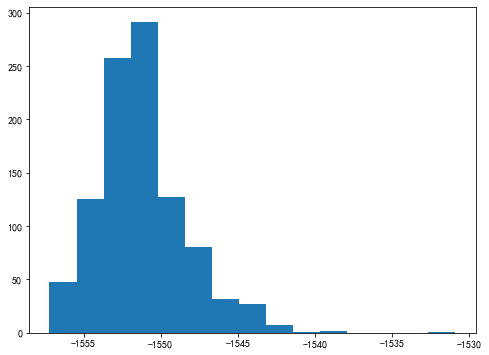

(997, 73)

In [32]:
# plt.hist(df_Y,bins=30)  # 查看目标变量分布情况
# B40存在异常值： data["Y"] > -92000

plt.figure(figsize=(8,6))
plt.hist(df_Y,bins=15,)  # 查看目标变量分布情况
plt.xlabel = "团簇能量值"
plt.ylabel = "团簇频数"
plt.show()
# Au20 存在离群值，-1530.908363

# 删除离群点
data_drop = data[(data["Y"] < -1535)]
# data_drop = data[(data["Y"] < -92000)]
data_drop.shape

In [33]:
# 数据标准化
zscore = preprocessing.StandardScaler()
data_scale = zscore.fit_transform(data_drop)
data_scale.shape

(997, 73)

In [34]:
# 主成分降维
pca = PCA(n_components=0.9)
pca.fit(data_scale[:,0:data_scale.shape[1]-1])
data_scale_pca = pca.transform(data_scale[:,0:data_scale.shape[1]-1])
data_scale_pca.shape

(997, 19)

In [35]:
# 划分数据集（测试发现：为标准化，进行降维之后效果较差）

# 下面是标准化，未进行主成分降维的数据
# X_data = data_scale[:,range(data_scale.shape[1]-1)]
# Y_data = data_scale[:,-1]

# 下面是标准化，进行主成分降维的数据
X_data = data_scale_pca[:,range(data_scale_pca.shape[1]-1)]
Y_data = data_scale[:,-1]

# 下面是不标准化，未进行主成分降维的数据
# X_data = data_drop.iloc[:,range(data_drop.shape[1]-1)]
# Y_data = data_drop.iloc[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X_data,Y_data,random_state=200,test_size=0.7)

In [38]:
def cross_valid_allmodel(model,X,Y,kfold=5):
    """
    构建一个交叉验证方法
    返回交叉验证的评分
    """
    cv = ShuffleSplit(n_splits=20, test_size=.3, random_state=0) 
    scores_CV = cross_val_score(model, X_data, Y_data, cv=cv)  
    return scores_CV

models = {
    "Linear Regression":LinearRegression(),
    "Ridge Regression":Ridge(),
    "Linear SVM":LinearSVR(),
    "SVM":SVR(),
#     "Random Forest":RandomForestRegressor(), # 计算时间较长
    "XGBoost":XGBRegressor(),
    "AdaBoost":AdaBoostRegressor()
}

scores_dict = {}
for name,model in models.items():
    scores_CV = cross_valid_allmodel(model,X_data, Y_data,kfold=10)
    print(name,":",scores_CV)
    scores_dict[name] = scores_CV  # 保存交叉验证评分结果
df_scoresCV = pd.DataFrame(scores_dict)
df_scoresCV.to_csv("../A2_data/A2_output/df_scoresCV.csv",index=False,header=True)

Linear Regression : [0.60445493 0.6395098  0.62928715 0.58229806 0.64247684 0.60327292
 0.59550326 0.64547693 0.65087941 0.6016625  0.61539482 0.64411327
 0.62722457 0.63294893 0.60716646 0.6311755  0.59819278 0.56553569
 0.60032313 0.63388772]
Ridge Regression : [0.60445464 0.63959332 0.62925546 0.5825188  0.64246008 0.60330837
 0.59557965 0.64546671 0.65089359 0.60173486 0.6154175  0.64410708
 0.62715931 0.63295251 0.60730181 0.6312326  0.5981603  0.56555049
 0.60034787 0.63385315]
Linear SVM : [0.59672812 0.63460537 0.60755179 0.60302552 0.64521741 0.59559304
 0.59330713 0.61614666 0.6452947  0.57200926 0.57409758 0.63242022
 0.57988698 0.60043126 0.63240961 0.64049447 0.56666069 0.55130708
 0.59062408 0.60316572]
SVM : [0.68352099 0.75733163 0.72268088 0.74379434 0.73137885 0.71263551
 0.70912201 0.72426894 0.74152499 0.68567201 0.71269682 0.71240122
 0.72438193 0.69358764 0.71880124 0.73923317 0.66441115 0.67438535
 0.69569553 0.71129688]
XGBoost : [0.69238136 0.72776578 0.6831753

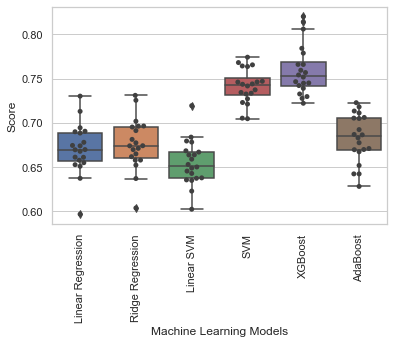

'\n从不同模型交叉验证的箱线图可以发现，黑箱算法（SVM/XGBoost/AdaBoost）普遍比白箱算法（线性回归，岭回归）预测效果较好。\n但白箱算法的预测评分的中位数也在0.91附近，在应用中完全可以接受。\n故考虑模型可接受性，最终预测模型选择线性回归模型\n'

In [47]:
score_plotdata = pd.DataFrame(scores_dict).melt()

# 可视化绘制箱线图
sns.set(style="whitegrid", color_codes=True)
sns.boxplot(x="variable", y="value",data=score_plotdata)
sns.swarmplot(x="variable", y="value", data=score_plotdata, color=".25")
plt.xticks(rotation=90)
plt.xlabel("Machine Learning Models")
plt.ylabel("Score")
plt.show()

"""
从不同模型交叉验证的箱线图可以发现，黑箱算法（SVM/XGBoost/AdaBoost）普遍比白箱算法（线性回归，岭回归）预测效果较好。
但白箱算法的预测评分的中位数也在0.91附近，在应用中完全可以接受。
故考虑模型可接受性，最终预测模型选择线性回归模型
"""

[ 0.15094 -0.04313  0.0516  -0.01173 -0.05661  0.06288  0.01489  0.02715
 -0.03928  0.0105   0.20411  0.2364  -0.00896 -0.01287  0.19813  0.14009
 -0.0457  -0.09953]
Training set score:0.6574747605
Test set score:0.6215628752
Training set MSE:0.34
Test set MSE:0.38


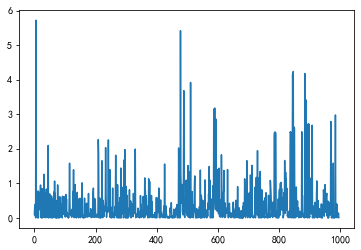

'由于数据中存在异常值，所以可以发现残差图中有一处明显凸起。但整体上而言，无异常现象。'

In [39]:
"""线性回归"""
lr = LinearRegression(fit_intercept=False,normalize=True,n_jobs=10).fit(X_train,y_train)
lr_coef = np.round(lr.coef_,5)
print(lr_coef)
print('Training set score:{:.10f}'.format(lr.score(X_train,y_train)))
print('Test set score:{:.10f}'.format(lr.score(X_test,y_test)))
print("Training set MSE:{:.2f}".format(mean_squared_error(y_train,lr.predict(X_train))))
print("Test set MSE:{:.2f}".format(mean_squared_error(y_test,lr.predict(X_test))))
lr_predict = lr.predict(X_data)
predict_data = pd.concat([pd.DataFrame(X_data),pd.DataFrame(Y_data,columns=["Y"]),pd.DataFrame(lr_predict,columns=["predict"])],axis=1)
predict_data.to_csv("../A2_data/A2_output/Au20_predictdata.csv",index=False,header=True)

# 残差图
plt.plot((lr.predict(X_data)-Y_data)**2)
plt.show()
"由于数据中存在异常值，所以可以发现残差图中有一处明显凸起。但整体上而言，无异常现象。"